# Cross-correlation for magnetic data

**This notebook shows the use of the cross-correlation coefficient techniqe for magnetic data. This technique was used by several research groups$^*$ in order to estimate the magnetization direction and another signals that also depend on this vector, although not very changeable or influential by this vector.**

**The simple cross-correlation coeficient is given by:**
# $$ C = \dfrac{\sum(F - \bar{F})(G - \bar{G})}
{\sqrt{\sum(F - \bar{F})^2 \sum(G - \bar{G})^2}} $$ 
**where $F$ and $G$ represent the two magnetic data, firs derivative and horizontal gradient, for example; and $\bar{F}$ and $\bar{G}$ represent the mean for the two data sets.**

### *Some researches: 
* Fedi, M., Florio, G., & Rapolla, A. (1994). A method to estimate the total magnetization direction from a distortion analysis of magnetic anomalies. Geophysical Prospecting, 42(3), 261-274. Doi: [10.1111/j.1365-2478.1994.tb00209.x/abstract](http://onlinelibrary.wiley.com/doi/10.1111/j.1365-2478.1994.tb00209.x/abstract)

* Dannemiller, N., & Li, Y. (2006). A new method for determination of magnetization direction. Geophysics, 71(6), L69-L73. Doi: [10.1190/1.2356116](http://library.seg.org/Doi/10.1190/1.2356116)

* Gerovska, D., Araúzo‐Bravo, M. J., & Stavrev, P. (2009). Estimating the magnetization direction of sources from southeast Bulgaria through correlation between reduced‐to‐the‐pole and total magnitude anomalies. Geophysical Prospecting, 57(4), 491-505. Doi: [10.1111/j.1365-2478.2008.00761.x](http://onlinelibrary.wiley.com/doi/10.1111/j.1365-2478.2008.00761.x/full)

In [1]:
# Importing all libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Defines number of points
n = 20
# Define the position vectors
x = np.linspace(-1500, 1500, n)
y = x
z = -10.
# Creates the grid
X, Y = np.meshgrid(x, y)

In [3]:
# Define the elements of the prims for gravity and magnetic computation
modelmag = (-400., 400., -400., 400., 200., 600., 1.0)
area = modelmag[:4]
# Directions
incf, decf = 55., -44. # field
incs, decs = 33., 22. # source

In [4]:
# Total field anomaly due to a prism
from codes.prism import prism_tf
from codes.plot import draw_prism

In [5]:
# Calculating the total field anomaly
tf = prism_tf(X, Y, z, modelmag, incf, decf, incs, decs)

In [6]:
# Statistical 
from codes.auxiliars import addnoise
from codes.statistical import analysis

In [7]:
_ = analysis(tf, 'nT')

Minimum:    -70.9312 nT
Maximum:    172.6992 nT
Mean value: 2.9905 nT
Variation:  243.6304 nT


In [8]:
# Adding noise
tfa = addnoise(tf, 2., 0.1)

In [9]:
# Importing filtering functions
from codes.filtering import reduction
from codes.derivative import totalgrad, zderiv

In [10]:
# Importing the correlation function
from codes.statistical import cccoef

**Testing for positive inclination values (True direction)**

In [11]:
# Creating the inclination and declination values
inc = np.arange(10, 91, 1)
dec = np.arange(-180., 181., 1)

# Grid creation
Dec, Inc = np.meshgrid(dec, inc)

In [34]:
# Size of the vectors
ni, nd = inc.size, dec.size
coef = np.zeros_like(Dec)

In [36]:
# Calculation
for i in range(ni):
    for j in range(nd):
        rtp = reduction(x, y, tfa, incf, decf, inc[i], dec[j])
        tga = totalgrad(x, y, rtp)
        vga = zderiv(x, y, rtp)
        coef[i,j] = cccoef(tga, vga)

In [38]:
# Analysing the positive coefficients
_ = analysis(coef, 'no unit')

Minimum:    0.0833 no unit
Maximum:    0.7318 no unit
Mean value: 0.4941 no unit
Variation:  0.6485 no unit


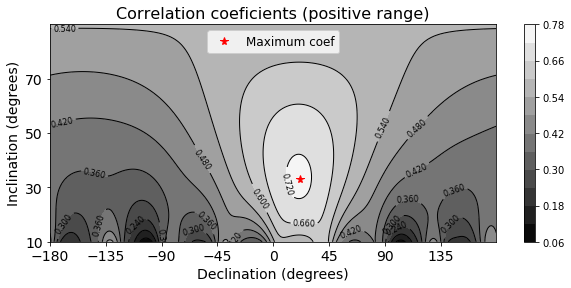

In [47]:
# Plotting the true correlation
plt.figure(figsize=(10,4))
fig1 = plt.contour(Dec, Inc, coef, 10, colors = 'k', linestyle = 'solid', linewidths = 1)
plt.contourf(Dec, Inc, coef, 10, cmap = plt.cm.gray)
plt.plot(decs, incs, 'r*', markersize = 8, label = 'Maximum coef')
plt.clabel(fig1, fontsize = 8)
plt.rcParams['contour.negative_linestyle'] = 'solid'
plt.title('Correlation coeficients (positive range)', fontsize = 16)
plt.xlabel('Declination (degrees)', fontsize = 14)
plt.ylabel('Inclination (degrees)', fontsize = 14)
plt.xticks(np.arange(dec.min(), dec.max(), 45), fontsize = 14)
plt.yticks(np.arange(inc.min(), inc.max(), 20), fontsize = 14)
plt.legend(loc = 'upper center', fontsize = 'large')
plt.colorbar()

plt.savefig('figures/correlation(1).png', facecolor='w', edgecolor='w', bbox_inches='tight')
plt.show()

**Testing for negative inclination values (Wrong direction)**

In [48]:
# Creating the inclination and declination values
inc = np.arange(-90,-9, 1)
dec = np.arange(-180., 181., 1)

# Grid criation 
Dec, Inc = np.meshgrid(dec, inc)

In [49]:
# Size of the vectors
ni, nd = inc.size, dec.size
coef = np.zeros_like(Dec)

In [50]:
# Calculation
for i in range(ni):
    for j in range(nd):
        rtp = reduction(x, y, tfa, incf, decf, inc[i], dec[j])
        tga = totalgrad(x, y, rtp)
        vga = zderiv(x, y, rtp)
        coef[i,j] = cccoef(tga, vga)

In [52]:
# Analysing the negative coefficients
_ = analysis(coef, '(no unit)')

Minimum:    -0.7318 (no unit)
Maximum:    -0.0833 (no unit)
Mean value: -0.4946 (no unit)
Variation:  0.6485 (no unit)


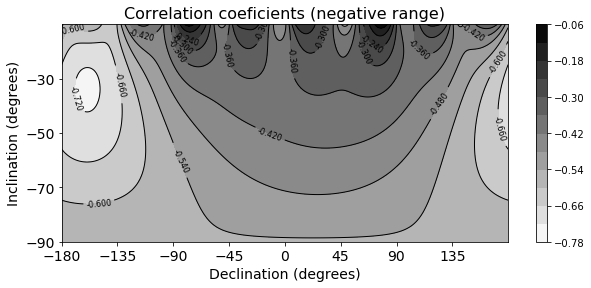

In [59]:
# Plotting the results
plt.figure(figsize=(10,4))
fig1 = plt.contour(Dec, Inc, coef, 10, colors = 'k', linestyle = 'solid', linewidths = 1)
plt.contourf(Dec, Inc, coef, 10, cmap = plt.cm.gray_r)
#plt.plot(decs, incs, 'r*', markersize = 8, label = 'Maximum coef')
plt.clabel(fig1, colors = 'k', fontsize = 8)
plt.rcParams['contour.negative_linestyle'] = 'solid'
plt.title('Correlation coeficients (negative range)', fontsize = 16)
plt.xlabel('Declination (degrees)', fontsize = 14)
plt.ylabel('Inclination (degrees)', fontsize = 14)
plt.xticks(np.arange(dec.min(), dec.max(), 45), fontsize = 14)
plt.yticks(np.arange(inc.min(), inc.max(), 20), fontsize = 14)
plt.legend(loc = 'upper center', fontsize = 'large')
plt.colorbar()

plt.savefig('figures/correlation(2).png', facecolor='w', edgecolor='w', bbox_inches='tight')
plt.show()